# New Plant Diseases Dataset

## Image dataset containing different healthy and unhealthy crop leaves.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
import os

os.listdir('../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/')

['valid', 'train']

In [3]:
train = '../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/'
val = '../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/'

In [4]:
len(os.listdir(train))

38

## Image Data 

In [5]:
lst = []

for directory in os.listdir(train):
    lst.append(directory)

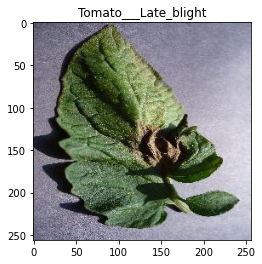

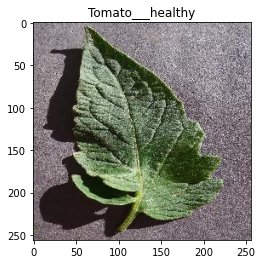

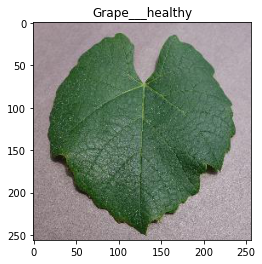

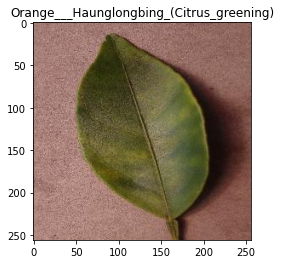

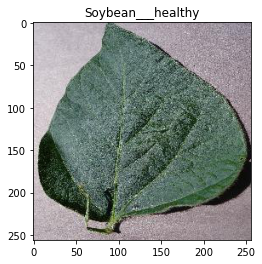

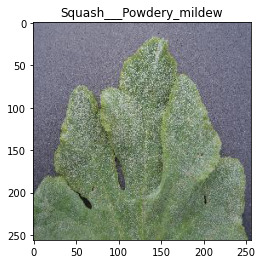

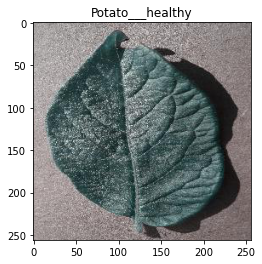

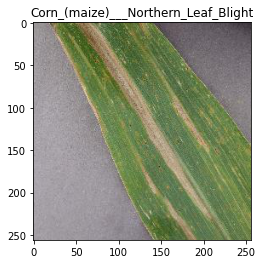

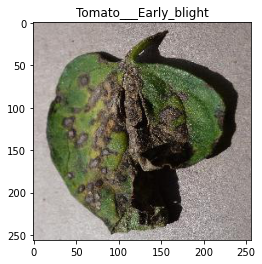

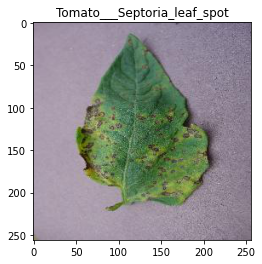

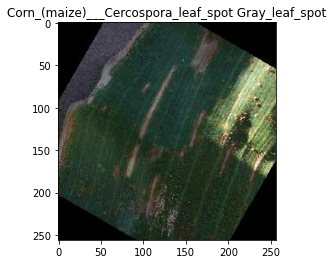

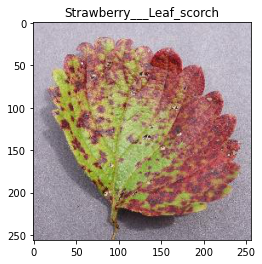

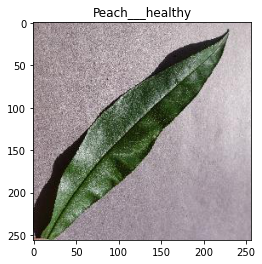

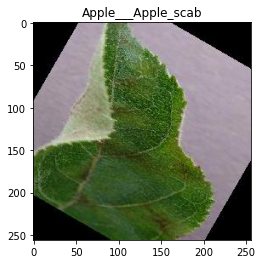

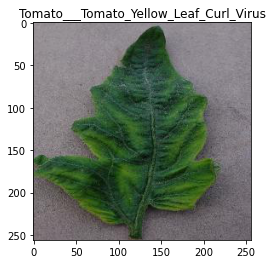

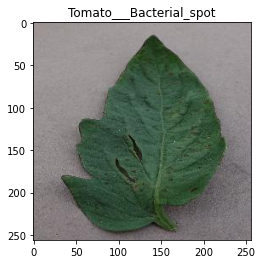

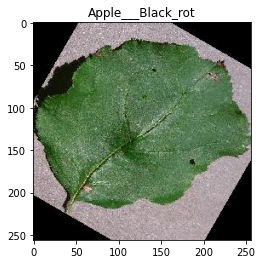

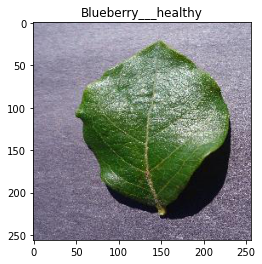

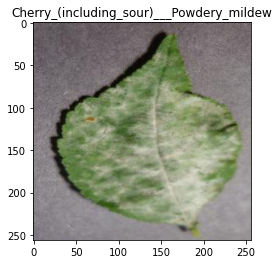

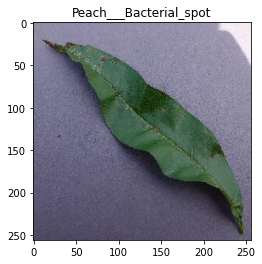

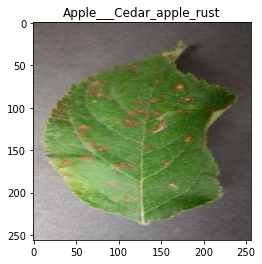

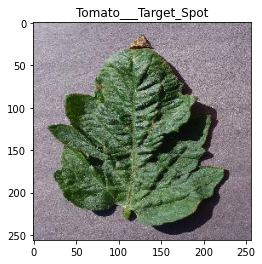

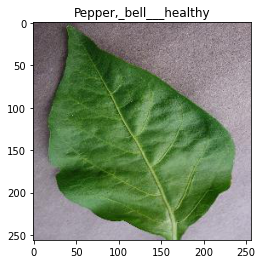

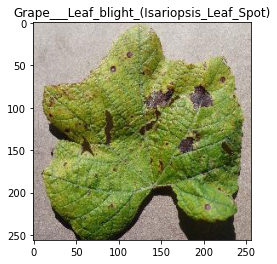

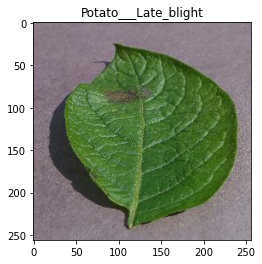

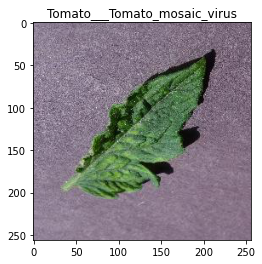

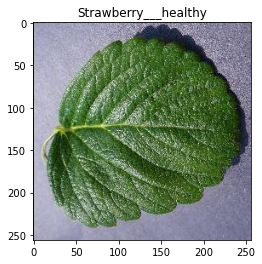

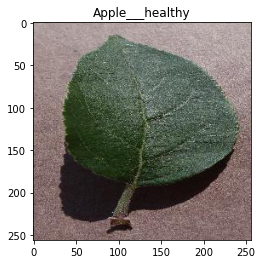

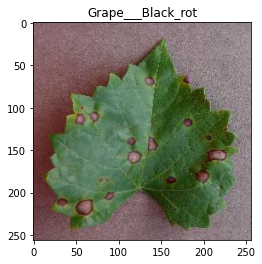

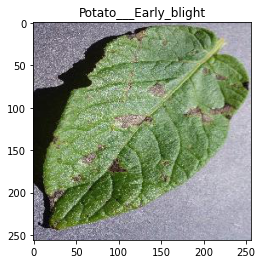

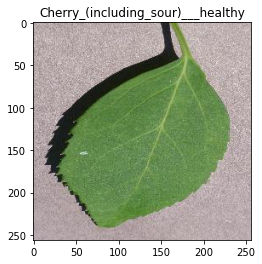

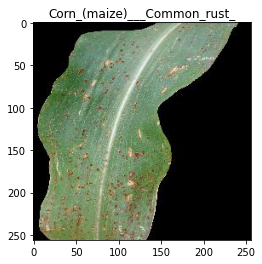

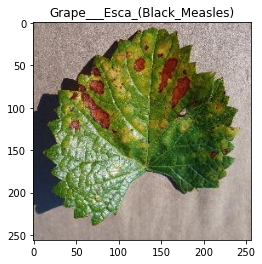

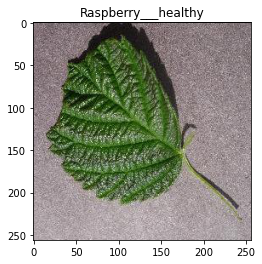

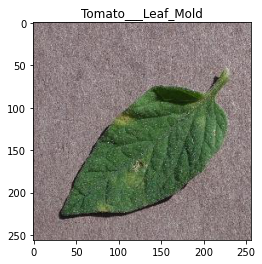

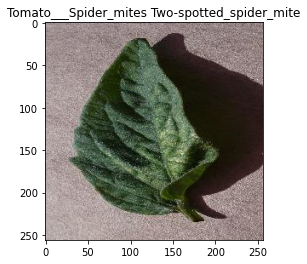

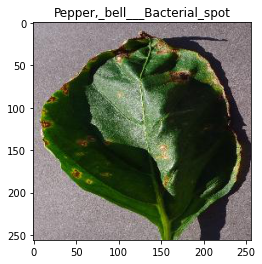

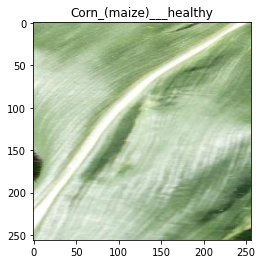

In [6]:
for i in lst:
    img = os.listdir(train + i)[0]
    plt.title(i)
    plt.imshow(imread(train+i+'/'+img))  
    plt.show()
    continue

In [7]:
imread('../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655_270deg.JPG').shape

(256, 256, 3)

## Creating a Model - VGG16

In [8]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np

In [9]:
IMAGE_SIZE = [224, 224]

In [10]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [11]:

# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [12]:

# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [13]:

prediction = Dense(38, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [14]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## Data Argumentation

In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 70295 images belonging to 38 classes.


In [18]:

val_set = val_datagen.flow_from_directory(val,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 17572 images belonging to 38 classes.


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=1)

## Training...

In [20]:
r = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  callbacks=[early_stop]  
)

Epoch 1/15
2197/2197 [==============================] - 1372s 624ms/step - loss: 0.6100 - accuracy: 0.8309 - val_loss: 0.4799 - val_accuracy: 0.8813
Epoch 2/15
2197/2197 [==============================] - 1033s 470ms/step - loss: 0.4074 - accuracy: 0.8992 - val_loss: 0.3560 - val_accuracy: 0.9175
Epoch 3/15
2197/2197 [==============================] - 1060s 482ms/step - loss: 0.3539 - accuracy: 0.9195 - val_loss: 0.4070 - val_accuracy: 0.9183


In [21]:
training_set.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [22]:
metrics = pd.DataFrame(model.history.history)

In [23]:
metrics

loss  accuracy  val_loss  val_accuracy
0  0.610041  0.830913  0.479862      0.881345
1  0.407355  0.899168  0.355997      0.917482
2  0.353862  0.919511  0.407038      0.918279

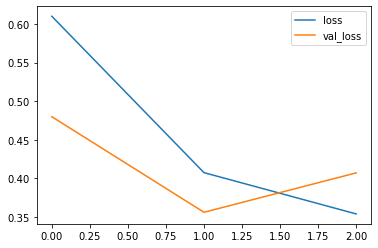

In [24]:
metrics[['loss','val_loss']].plot()

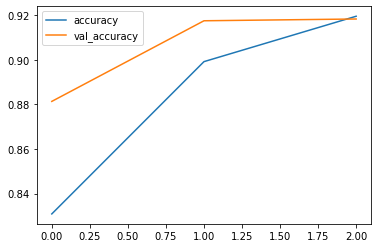

In [25]:
metrics[['accuracy','val_accuracy']].plot()

In [26]:
model.evaluate_generator(val_set,verbose=0)

[0.40703752636909485, 0.9182790517807007]

In [27]:
prediction = model.predict_generator(val_set)

In [28]:
model.save('leaf_model.h5')

# Wow....... 91% !!!!

In [30]:
training_set.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [31]:
classes = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

# Checking Our Model

In [36]:
image_size = IMAGE_SIZE + [3]

In [37]:
from tensorflow.keras.preprocessing import image

# 1

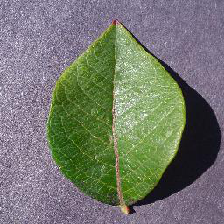

In [45]:
img = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Blueberry___healthy/02f89fdc-2492-41a2-ad6e-5d83b2f2e1b2___RS_HL 5056.JPG"
my_image = image.load_img(img,target_size=image_size)

my_image  # Blueberry___healthy

In [46]:
my_image = image.img_to_array(my_image)

my_image = np.expand_dims(my_image, axis=0)

model.predict(my_image)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
ans = model.predict(my_image)
res = ans[0]==max(ans[0])
j=0;
for i in res:
    if i:
        print(classes[j])
    j = j+1

Blueberry___healthy


# 2

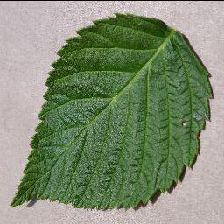

In [66]:
img = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Raspberry___healthy/020e14fb-6016-4d7f-b489-445e0021b58e___Mary_HL 6324_90deg.JPG"

my_image = image.load_img(img,target_size=image_size)

my_image  #Raspberry___healthy

In [67]:
my_image = image.img_to_array(my_image)

my_image = np.expand_dims(my_image, axis=0)

model.predict(my_image)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

In [68]:
ans = model.predict(my_image)
res = ans[0]==max(ans[0])
j=0;
for i in res:
    if i:
        print(classes[j])
    j = j+1

Raspberry___healthy


# 3

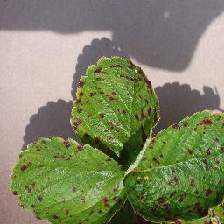

In [69]:
img = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/01d11a79-f858-4e58-9b14-c3f0619af1f7___RS_L.Scorch 0090_flipLR.JPG"


my_image = image.load_img(img,target_size=image_size)

my_image  #Strawberry___Leaf_scorch

In [70]:
my_image = image.img_to_array(my_image)

my_image = np.expand_dims(my_image, axis=0)

model.predict(my_image)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

In [71]:
ans = model.predict(my_image)
res = ans[0]==max(ans[0])
j=0;
for i in res:
    if i:
        print(classes[j])
    j = j+1

Strawberry___Leaf_scorch


# 4

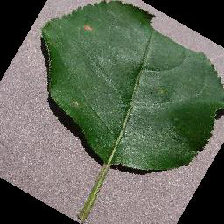

In [72]:
img = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Black_rot/02859ed3-f56a-4315-82a5-c1cb72717225___JR_FrgE.S 8584_new30degFlipLR.JPG"

my_image = image.load_img(img,target_size=image_size)

my_image  #Apple___Black_rot

In [73]:
my_image = image.img_to_array(my_image)

my_image = np.expand_dims(my_image, axis=0)

model.predict(my_image)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

In [74]:
ans = model.predict(my_image)
res = ans[0]==max(ans[0])
j=0;
for i in res:
    if i:
        print(classes[j])
    j = j+1

Apple___Black_rot


# 5

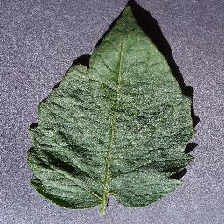

In [75]:
img = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___healthy/04c78dad-c1eb-4a1b-bfeb-da4c7cc528e1___RS_HL 9688.JPG"
my_image = image.load_img(img,target_size=image_size)

my_image  #Tomato___healthy

In [76]:
my_image = image.img_to_array(my_image)

my_image = np.expand_dims(my_image, axis=0)

model.predict(my_image)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.]], dtype=float32)

In [77]:
ans = model.predict(my_image)
res = ans[0]==max(ans[0])
j=0;
for i in res:
    if i:
        print(classes[j])
    j = j+1

Tomato___healthy


# Finally We did it !!!!

# Model is seriously performing best...

# We Have Successfully Create a best model .............!!!!!!!

Thankyou